In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [146]:
data_df = pd.read_csv('titanic.csv')
data_df.head(3) #y데이터가 껴있음

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [147]:
# 생존자를 y데이터에 넣기
y_data = data_df[['Survived']]
y_data.head(3) #y데이터 활용

,Survived
0,0
1,1
2,1


In [148]:
# 생존자 x 데이터에서 빼기
del data_df['Survived']
x_data = data_df.copy()
x_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [149]:
# 필요없다 생각하는 id와 티켓을 뺌(티켓은 문자만 있는것 있고 숫자만 있는게 있음), 이름 뺌
del data_df['PassengerId']
del data_df['Ticket']
del data_df['Name']
x_data = data_df.copy()

In [150]:
#남자 = 0, 여자 = 1 로 바꿔줌
x_data['Sex'] = x_data['Sex'].apply(lambda x : 0 if x == 'male' else 1)
x_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,22.0,1,0,7.2500,NaN,S
1,1,1,38.0,1,0,71.2833,C85,C
2,3,1,26.0,0,0,7.9250,NaN,S
3,1,1,35.0,1,0,53.1000,C123,S
4,3,0,35.0,0,0,8.0500,NaN,S


In [151]:
#중위값을 Age가 빈곳에 채워줌 
mean_age = x_data['Age'].median(skipna=True) # median 중앙값
x_data['Age'] = x_data['Age'].fillna(mean_age)

In [152]:
# cabin의 빈곳을 NO로 채움 -> 문자만 남기고 숫자 제거 -> 위치만 구분하기 위해 첫문자 만
x_data['Cabin'] = x_data['Cabin'].fillna('NO')
x_data['Cabin'] = x_data['Cabin'].str.replace(pat=r'[^A-Z]', repl= r' ', regex=True) # 숫자 제거
x_data['Cabin'] = x_data['Cabin'].apply(lambda x: x[0]) # 첫글자 만

In [153]:
x_data['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [154]:
x_data['Embarked'].value_counts() #  s 644 / c 168 / q 77

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [155]:
# cabin의 값을 숫자로 바꿔줌
x_data['Cabin'] = x_data['Cabin'].replace(['A','B','C','D','E','F','G','T','N'], [1,2,3,4,5,6,7,8,9])

In [156]:
# 승선지를 문자를 숫자로 바꿔주는 함수
def em_to_num(data):
    if data == 'C':
        return 1
    elif data == 'Q':
        return 2
    else:
        return 3

In [157]:
x_data['Embarked'] = x_data['Embarked'].apply(em_to_num)

In [158]:
x_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,22.0,1,0,7.2500,9,3
1,1,1,38.0,1,0,71.2833,3,1
2,3,1,26.0,0,0,7.9250,9,3
3,1,1,35.0,1,0,53.1000,3,3
4,3,0,35.0,0,0,8.0500,9,3


In [159]:
# (배열, 행렬)로 바꿔주기
titanic_data = np.array(x_data) # 생존자 빼고 나머지
titanic_target = np.array(y_data) # 생존자

titanic_X = titanic_data # 생존자 빼고 나머지
titanic_Y = titanic_target # 생존자

# 비율을 7:3 으로 유지, seed는 0을 적용
x_train, x_test, y_train, y_test = model_selection.train_test_split(titanic_X, titanic_Y, test_size=0.3, random_state=0 )


In [160]:
model = linear_model.LogisticRegression() #로지스틱 모델 생성

In [161]:
model.fit(x_train,y_train) # train 데이터를 학습 시킴

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [162]:
pred_test = model.predict_proba(x_test)
pred_test

array([[0.84509635, 0.15490365],
       [0.87875182, 0.12124818],
       [0.93562656, 0.06437344],
       [0.06148662, 0.93851338],
       [0.33187034, 0.66812966],
       [0.53288449, 0.46711551],
       [0.08070077, 0.91929923],
       [0.07166715, 0.92833285],
       [0.48674642, 0.51325358],
       [0.28840585, 0.71159415],
       [0.90740421, 0.09259579],
       [0.25310984, 0.74689016],
       [0.86382808, 0.13617192],
       [0.12024176, 0.87975824],
       [0.04633377, 0.95366623],
       [0.25136902, 0.74863098],
       [0.85993691, 0.14006309],
       [0.77880672, 0.22119328],
       [0.90071771, 0.09928229],
       [0.71484207, 0.28515793],
       [0.6966262 , 0.3033738 ],
       [0.05449192, 0.94550808],
       [0.86383206, 0.13616794],
       [0.57084975, 0.42915025],
       [0.30185073, 0.69814927],
       [0.10604304, 0.89395696],
       [0.89175763, 0.10824237],
       [0.30304175, 0.69695825],
       [0.18168857, 0.81831143],
       [0.44056827, 0.55943173],
       [0.

In [163]:
# 모델 분류의 정확도
print('Accuracy: ', accuracy_score(model.predict(x_test), y_test))

Accuracy:  0.8022388059701493


In [164]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1])
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치) / ROC-Curve 가 그리는 아래 면적을 의미하고 1이 가장 이상적으로 판단

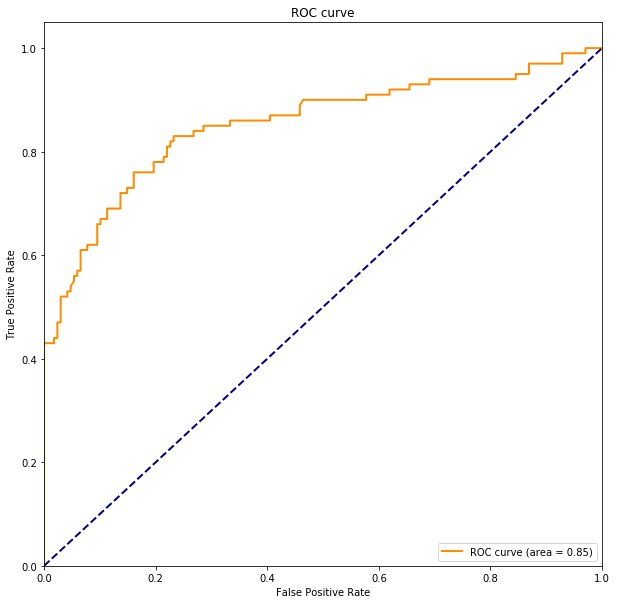

In [165]:
# 시각화
plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()